In [1]:
# we will import all the necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import json
import re
from shapely.geometry import Point, LineString #this library is for manipulating geometric objects, and it is what geopandas uses to store geometries
from scipy.spatial import distance

In [2]:
from operator import itemgetter

In [3]:
from itertools import permutations

In [4]:
#import the necessary libraries 
#import pandas as pd
#import matplotlib.pyplot as plt
#import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
#import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

In [5]:
#set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [6]:
G = nx.read_graphml("london.graph")

In [7]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [8]:
# To check node attributes:
list(G.nodes(data = True))

[('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)}),
 ('Kingsbury', {'coords': (519359.9688603217, 188721.22027255083)}),
 ('Queensbury', {'coords': (518811.3613368616, 189760.50737704366)}),
 ('Canons Park', {'coords': (518183.29968291725, 191257.26260848)}),
 ('Stanmore', {'coords': (517580.4596464033, 192537.99948098673)}),
 ('Stratford', {'coords': (538524.7855297636, 184373.34100822973)}),
 ('West Ham', {'coords': (539160.2577659411, 182933.290067989)}),
 ('Canning Town', {'coords': (539439.020753582, 181338.40907066417)}),
 ('North Greenwich', {'coords': (539189.2108512281, 179809.60035511653)}),
 ('Canary Wharf', {'coords': (537586.6947649193, 180311.85419390627)}),
 ('Canada Water', {'coords': (535482.2867206828, 179448.66561502634)}),
 ('Bermondsey', {'coords': (534502.7607083861, 179420.4002671783)}),
 ('London Bridge', {'coords': (532684.1180177411, 180183.89658802713)}),
 ('Southwark', {'coords': (531610.1677530061, 180051.36329176498)}),
 ('Waterloo', {'

In [9]:
len(list(G.nodes(data = True)))

401

In [10]:
pos = nx.get_node_attributes(G, 'coords')

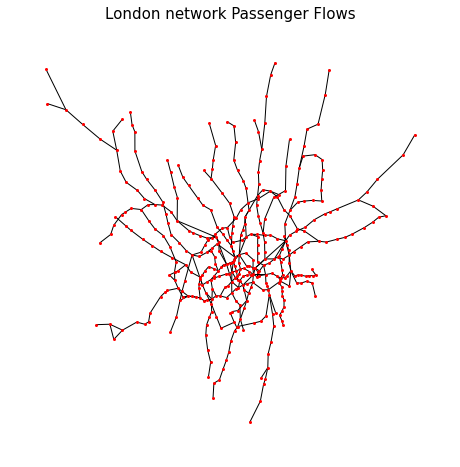

In [12]:
# Plot topological version
fig, ax = plt.subplots(figsize=(8,8))

#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G, pos,edge_color='black')

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'red',
        node_size= 4)

#plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London network Passenger Flows",fontsize=15)
plt.show()

In [13]:
# Add inverse weights which is needed in the calculation of weighted betweenness centrality

inv_flows={(e1, e2):round(1./(flows + 0.001),7) for e1, e2, flows in G.edges(data='flows')}

# Let us add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(G, inv_flows, 'inv_flows')

# Print edge list with attributes
list(G.edges(data = True))[0:1]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'inv_flows': 8.09e-05})]

### centrality (section 1.1 in the assessment)

#### Degree centrality

In [14]:
#  We can calculate the degree centrality using networkx function:
G_degree_norm =nx.degree_centrality(G)

In [15]:
G_degree_norm

{'Wembley Park': 0.01,
 'Kingsbury': 0.005,
 'Queensbury': 0.005,
 'Canons Park': 0.005,
 'Stanmore': 0.0025,
 'Stratford': 0.0225,
 'West Ham': 0.015,
 'Canning Town': 0.015,
 'North Greenwich': 0.005,
 'Canary Wharf': 0.01,
 'Canada Water': 0.01,
 'Bermondsey': 0.005,
 'London Bridge': 0.01,
 'Southwark': 0.005,
 'Waterloo': 0.015,
 'Westminster': 0.01,
 'Green Park': 0.015,
 'Bond Street': 0.01,
 'Baker Street': 0.0175,
 "St. John's Wood": 0.005,
 'Swiss Cottage': 0.005,
 'Finchley Road': 0.01,
 'Neasden': 0.005,
 'Dollis Hill': 0.005,
 'Willesden Green': 0.005,
 'Kilburn': 0.005,
 'West Hampstead': 0.01,
 'West Acton': 0.005,
 'Ealing Broadway': 0.005,
 'North Acton': 0.0075,
 'West Ruislip': 0.0025,
 'Ruislip Gardens': 0.005,
 'South Ruislip': 0.005,
 'Northolt': 0.005,
 'Greenford': 0.005,
 'Perivale': 0.005,
 'Hanger Lane': 0.005,
 'East Acton': 0.005,
 'White City': 0.005,
 "Shepherd's Bush": 0.01,
 'Holland Park': 0.005,
 'Notting Hill Gate': 0.01,
 'Queensway': 0.005,
 'Lanca

In [16]:
nx.set_node_attributes(G,dict(G_degree_norm),'degree centrality')

In [17]:
G_degree_df = pd.DataFrame.from_dict(dict(nx.get_node_attributes(G, 'degree centrality')),orient='index').sort_values(by=0,ascending=False)

In [18]:
G_degree_df['station'] = G_degree_df.index

In [19]:
G_degree_df = G_degree_df.rename(columns={0:"degree centrality"})

In [20]:
G_degree_df.head(12)

,degree centrality,station
Stratford,0.0225,Stratford
Bank and Monument,0.0200,Bank and Monument
King's Cross St. Pancras,0.0175,King's Cross St. Pancras
Baker Street,0.0175,Baker Street
Earl's Court,0.0150,Earl's Court
Oxford Circus,0.0150,Oxford Circus
Liverpool Street,0.0150,Liverpool Street
Waterloo,0.0150,Waterloo
Green Park,0.0150,Green Park
Canning Town,0.0150,Canning Town


In [21]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree centrality']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree centrality']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree centrality']/(max(degree_values)))*50 for i in G.nodes(data=True)]

In [22]:
len(deg_size)

401

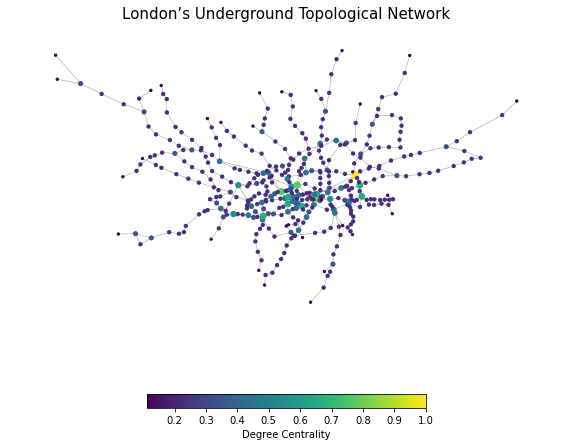

In [23]:
#we can plot the graph using the measure of degree:

fig, ax = plt.subplots(figsize=(10,8))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London’s Underground Topological Network",fontsize=15)
plt.show()

#### betweenness centrality

In [24]:
### First calculate Weighted betweenness centrality:
bet_w_G=nx.betweenness_centrality(G,weight='inv_flows')

In [25]:
bet_w_G

{'Wembley Park': 0.14463659147869676,
 'Kingsbury': 0.014924812030075188,
 'Queensbury': 0.009974937343358397,
 'Canons Park': 0.005,
 'Stanmore': 0.0,
 'Stratford': 0.33129072681704264,
 'West Ham': 0.14834586466165414,
 'Canning Town': 0.0799874686716792,
 'North Greenwich': 0.008909774436090225,
 'Canary Wharf': 0.05849624060150376,
 'Canada Water': 0.13043859649122808,
 'Bermondsey': 0.12724310776942357,
 'London Bridge': 0.13596491228070176,
 'Southwark': 0.0,
 'Waterloo': 0.4164285714285714,
 'Westminster': 0.3813659147869674,
 'Green Park': 0.5725563909774436,
 'Bond Street': 0.2918295739348371,
 'Baker Street': 0.24144110275689223,
 "St. John's Wood": 0.005,
 'Swiss Cottage': 0.0,
 'Finchley Road': 0.18611528822055137,
 'Neasden': 0.0049874686716791985,
 'Dollis Hill': 0.0,
 'Willesden Green': 0.0,
 'Kilburn': 0.0049874686716791985,
 'West Hampstead': 0.03845864661654135,
 'West Acton': 0.0008521303258145364,
 'Ealing Broadway': 0.0008771929824561404,
 'North Acton': 0.03924812

In [26]:
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_w_G,'weighted_betweenness')

In [27]:

G_bet_w_df = pd.DataFrame.from_dict(dict(nx.get_node_attributes(G, 'weighted_betweenness')),orient='index').sort_values(by=0,ascending=False)
G_bet_w_df['station'] = G_bet_w_df.index
G_bet_w_df = G_bet_w_df.rename(columns={0:"weighted_betweenness"})


In [22]:
G_bet_w_df.head(10)

,weighted_betweenness,station
Green Park,0.572556,Green Park
Bank and Monument,0.505288,Bank and Monument
Waterloo,0.416429,Waterloo
Westminster,0.381366,Westminster
Liverpool Street,0.336817,Liverpool Street
Stratford,0.331291,Stratford
Bond Street,0.291830,Bond Street
Euston,0.284236,Euston
Oxford Circus,0.270764,Oxford Circus
Warren Street,0.254286,Warren Street


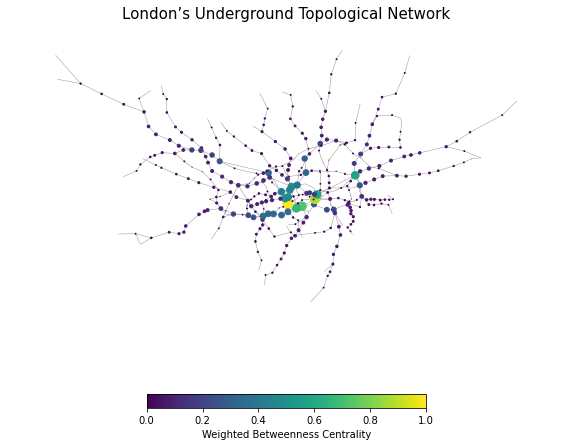

In [28]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['weighted_betweenness']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['weighted_betweenness']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['weighted_betweenness']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph



fig, ax = plt.subplots(figsize=(10,8))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Weighted Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London’s Underground Topological Network",fontsize=15)
plt.show()

In [29]:

# Next Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_G=nx.betweenness_centrality(G,normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_G,'betweenness')

In [28]:
bet_G

{'Wembley Park': 10780.813492063491,
 'Kingsbury': 1191.0,
 'Queensbury': 796.0,
 'Canons Park': 399.0,
 'Stanmore': 0.0,
 'Stratford': 23768.09343434341,
 'West Ham': 11119.621248196234,
 'Canning Town': 7674.09841269841,
 'North Greenwich': 2526.4904761904795,
 'Canary Wharf': 5848.217099567098,
 'Canada Water': 8590.281385281378,
 'Bermondsey': 5815.533333333337,
 'London Bridge': 6491.394155844155,
 'Southwark': 1379.3071428571413,
 'Waterloo': 19464.882323232327,
 'Westminster': 16226.155916305914,
 'Green Park': 17223.622113997128,
 'Bond Street': 11298.961255411277,
 'Baker Street': 15287.107611832655,
 "St. John's Wood": 144.25714285714298,
 'Swiss Cottage': 34.66666666666667,
 'Finchley Road': 13173.758008657984,
 'Neasden': 335.33333333333337,
 'Dollis Hill': 35.0,
 'Willesden Green': 96.66666666666666,
 'Kilburn': 458.66666666666663,
 'West Hampstead': 4539.465945165944,
 'West Acton': 659.7000000000002,
 'Ealing Broadway': 542.3333333333334,
 'North Acton': 3321.19999999999

In [30]:
G_bet_df = pd.DataFrame.from_dict(dict(nx.get_node_attributes(G, 'betweenness')),orient='index').sort_values(by=0,ascending=False)
G_bet_df['station'] = G_bet_df.index
G_bet_df = G_bet_df.rename(columns={0:"betweenness_centrality"})


In [30]:
G_bet_df.head(10)

,betweenness_centrality,station
Stratford,23768.093434,Stratford
Bank and Monument,23181.058947,Bank and Monument
Liverpool Street,21610.387049,Liverpool Street
King's Cross St. Pancras,20373.521465,King's Cross St. Pancras
Waterloo,19464.882323,Waterloo
Green Park,17223.622114,Green Park
Euston,16624.275469,Euston
Westminster,16226.155916,Westminster
Baker Street,15287.107612,Baker Street
Finchley Road,13173.758009,Finchley Road


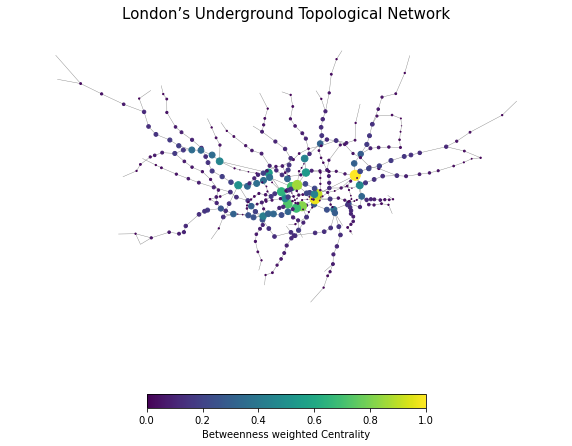

In [32]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph



fig, ax = plt.subplots(figsize=(10,8))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness weighted Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London’s Underground Topological Network",fontsize=15)
plt.show()

#### Closeness centrality

In [33]:
#closeness centrality: 
clos_top=nx.closeness_centrality(G)
#clos_w=nx.closeness_centrality(G, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_top,'closeness')

In [34]:
G_clos_df = pd.DataFrame.from_dict(dict(nx.get_node_attributes(G, 'closeness')),orient='index').sort_values(by=0,ascending=False)
G_clos_df['station'] = G_clos_df.index
G_clos_df = G_clos_df.rename(columns={0:"closeness centrality"})

In [29]:
G_clos_df.head(11)

,closeness centrality,station
Green Park,0.114778,Green Park
Bank and Monument,0.113572,Bank and Monument
King's Cross St. Pancras,0.113443,King's Cross St. Pancras
Westminster,0.112549,Westminster
Waterloo,0.112265,Waterloo
Oxford Circus,0.111204,Oxford Circus
Bond Street,0.110988,Bond Street
Farringdon,0.110742,Farringdon
Angel,0.110742,Angel
Moorgate,0.110314,Moorgate


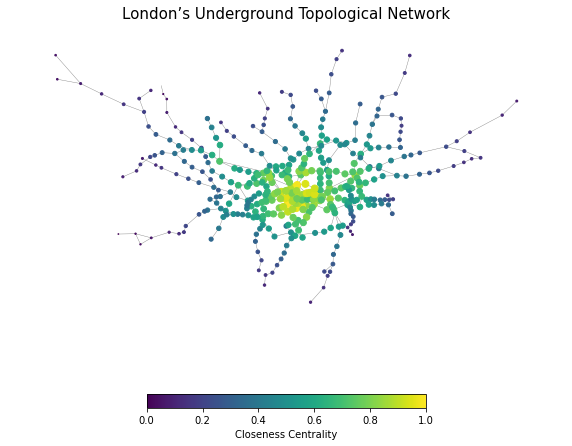

In [35]:
# Lets set color and width of nodes according to the closeness values

clos_val=[(i[1]['closeness']) for i in G.nodes(data=True)]

closs_color=[(i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val)) for i in G.nodes(data=True)]
closs_size=[((i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,8))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_color,
        node_size= closs_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London’s Underground Topological Network",fontsize=15)
plt.show()

#### eigenvector_centrality

In [36]:
eig_G = nx.eigenvector_centrality(G,max_iter=1000)

In [38]:
#eigenvector_centrality: 

#clos_w=nx.closeness_centrality(G, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,eig_G,'eigenvector')

In [39]:
G_eig_df = pd.DataFrame.from_dict(dict(nx.get_node_attributes(G, 'eigenvector')),orient='index').sort_values(by=0,ascending=False)
G_eig_df['station'] = G_eig_df.index
G_eig_df = G_eig_df.rename(columns={0:"eigenvector centrality"})

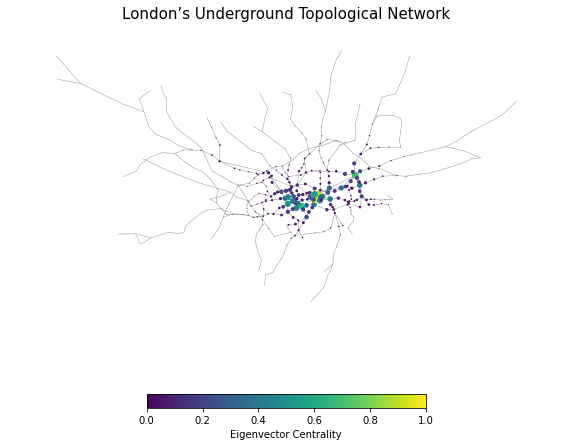

In [40]:
# Lets set color and width of nodes according to the closeness values

clos_val=[(i[1]['eigenvector']) for i in G.nodes(data=True)]

closs_color=[(i[1]['eigenvector']-min(clos_val))/(max(clos_val)-min(clos_val)) for i in G.nodes(data=True)]
closs_size=[((i[1]['eigenvector']-min(clos_val))/(max(clos_val)-min(clos_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,8))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_color,
        node_size= closs_size)

plt.colorbar(nod,label="Eigenvector Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London’s Underground Topological Network",fontsize=15)
plt.show()

### impact (section 2.3 in the assessment)

#### node removal for weighted and non-weighted betweenness centrality 

In [41]:
G1 = nx.read_graphml("london.graph")

G2 = nx.read_graphml("london.graph")

In [42]:
# Add inverse weights which is needed in the calculation of weighted betweenness centrality

inv_flows={(e1, e2):round(1./(flows + 0.001),7) for e1, e2, flows in G1.edges(data='flows')}

# Let us add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(G1, inv_flows, 'inv_flows')


In [43]:
# Add inverse weights which is needed in the calculation of weighted betweenness centrality

inv_flows={(e1, e2):round(1./(flows + 0.001),7) for e1, e2, flows in G2.edges(data='flows')}

# Let us add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(G2, inv_flows, 'inv_flows')


In [45]:
#Remove nodes:
G1.remove_nodes_from(['Stratford'])

In [46]:
len(list(G1.nodes))

400

In [41]:
nx.number_connected_components(G1)

3

In [47]:
# To obtain the largest component as a new graph: 

# Get the list of components:

components_1 = nx.connected_components(G1)
# Use the max() command to find the largest one:
largest_component_1 = max(components_1, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph_stratford = G1.subgraph(largest_component_1)

In [49]:
nx.average_shortest_path_length(Largest_subgraph_stratford,weight='inv_flows')

21.08137421687572

In [159]:
nx.average_shortest_path_length(Largest_subgraph_stratford)

14.496447069006436

In [83]:
lcc_stratford = (len(Largest_subgraph_stratford.nodes)/len(G.nodes)) * 100

In [84]:
lcc_stratford

94.51371571072319

In [50]:
#Remove nodes for weighted betweenness centrality version:
G2.remove_nodes_from(['Green Park'])

In [31]:
nx.number_connected_components(G2)

1

In [51]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components_2 = nx.connected_components(G2)
# Use the max() command to find the largest one:
largest_component_2 = max(components_2, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph_greenpark = G2.subgraph(largest_component_2)

In [52]:
nx.average_shortest_path_length(Largest_subgraph_greenpark,weight='inv_flows')

19.975776428484057

In [87]:
lcc_greenpark = (len(Largest_subgraph_greenpark.nodes)/len(G.nodes)) * 100

In [88]:
lcc_greenpark

99.75062344139651

### node removal (section 1.3 in the assessment)

#### non-sequential removal

In [53]:
# function of non-sequential removal
def non_sequential_removal(m):
    G_ = G.copy()
    values_sorted = sorted(m.items(), key=itemgetter(1), reverse=True)
    sorted_15=[e for e,v in values_sorted[:15]]
    #sorted_11
    
    G_r_sp = []
    G_r_c = []
    G_r_ge = []
    G_r_lcc = []
    #Remove nodes:
    for i in range(1,16):
        G_.remove_nodes_from(sorted_15[:i])
        components = nx.connected_components(G_)
        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
        Largest_subgraph = G_.subgraph(largest_component)

        G_r_sp.append(nx.average_shortest_path_length(Largest_subgraph))
        G_r_c.append(nx.average_clustering(G_))
        G_r_ge.append(nx.global_efficiency(G_))
        G_r_lcc.append((len(Largest_subgraph.nodes)/len(G.nodes)) * 100 )
        
        
        #comp.append(nx.number_connected_components(G_))

    return G_r_sp,G_r_c,G_r_ge,G_r_lcc
        
    

In [49]:
deg_sp_list, deg_c_list, deg_ge_list, G_lcc_list = non_sequential_removal(G_degree_norm)


In [138]:
comp

[3, 3, 3, 4, 5, 8, 8, 8, 9, 10, 10]

In [50]:
clos_sp_list, clos_c_list, clos_ge_list, clos_lcc_list = non_sequential_removal(clos_top)
bet_sp_list, bet_c_list, bet_ge_list, bet_lcc_list = non_sequential_removal(bet_G)
eig_sp_list, eig_c_list, eig_ge_list, eig_lcc_list = non_sequential_removal(eig_G)

##### global efficiency

In [51]:
deg_ge_df = pd.DataFrame(range(1,16),deg_ge_list)
deg_ge_df['deg'] = deg_ge_df.index
deg_ge_df = deg_ge_df.set_index(0)


In [52]:
deg_ge_df['clos'] = clos_ge_list
deg_ge_df['bet'] = bet_ge_list
deg_ge_df['eig'] = eig_ge_list

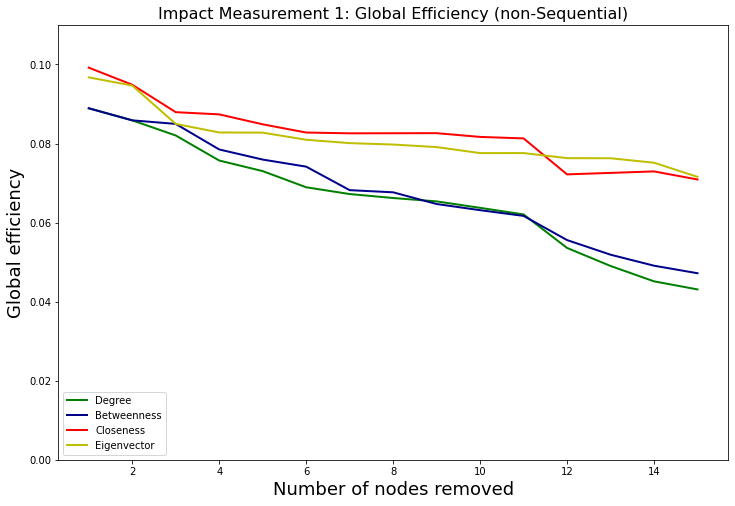

In [53]:
# plot the line chart: S_GE
plt.figure(figsize=(12,8))
plt.title('Impact Measurement 1: Global Efficiency (non-Sequential)',fontsize=16)
plt.xlabel(u'Number of nodes removed',fontsize=18)#
plt.ylabel(u'Global efficiency',fontsize=18)
 

in1, = plt.plot(deg_ge_df.deg,color="green",linewidth=2)
in2, = plt.plot(deg_ge_df.bet,color="darkblue",linewidth=2)
in3, = plt.plot(deg_ge_df.clos,color="red",linewidth=2)
in4, = plt.plot(deg_ge_df.eig,color="y",linewidth=2)

plt.ylim(0,0.11)
plt.legend(handles = [in1,in2,in3,in4],labels=['Degree','Betweenness','Closeness','Eigenvector'],loc=3)
plt.show()



##### largest component percentage


In [54]:
deg_lcc_df = pd.DataFrame(range(1,16),G_lcc_list)
deg_lcc_df['deg'] = deg_lcc_df.index
deg_lcc_df = deg_lcc_df.set_index(0)


In [55]:
deg_lcc_df['clos'] = clos_lcc_list
deg_lcc_df['bet'] = bet_lcc_list
deg_lcc_df['eig'] = eig_lcc_list

In [99]:
deg_lcc_df

,deg,clos,bet,eig
0,,,,
1,94.513716,99.750623,94.513716,99.750623
2,94.264339,99.501247,94.264339,99.501247
3,94.014963,99.251870,94.014963,94.014963
4,93.266833,99.002494,92.518703,93.765586
5,92.518703,98.753117,92.269327,93.516209
6,88.778055,98.503741,92.019950,93.266833
7,88.528678,98.254364,86.284289,93.017456
8,88.279302,98.004988,86.034913,92.518703
9,87.780549,97.755611,85.286783,92.269327


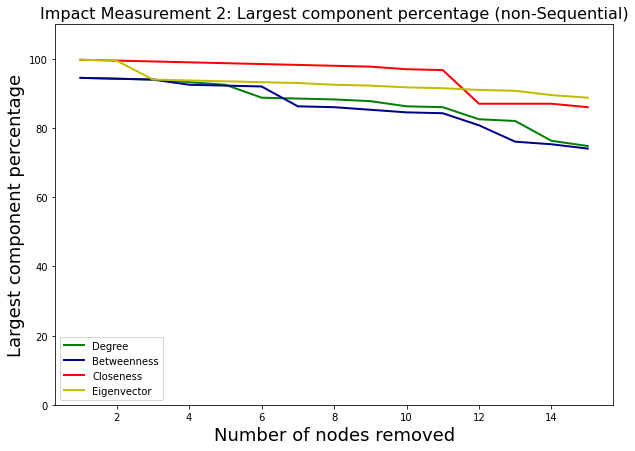

In [56]:
# plot the line chart: S_GE
plt.figure(figsize=(10,7))
plt.title('Impact Measurement 2: Largest component percentage (non-Sequential)',fontsize=16)
plt.xlabel(u'Number of nodes removed',fontsize=18)
plt.ylabel(u'Largest component percentage',fontsize=18)
 

in1, = plt.plot(deg_lcc_df.deg,color="green",linewidth=2)
in2, = plt.plot(deg_lcc_df.bet,color="darkblue",linewidth=2)
in3, = plt.plot(deg_lcc_df.clos,color="red",linewidth=2)
in4, = plt.plot(deg_lcc_df.eig,color="y",linewidth=2)


plt.ylim(0,110) 
plt.legend(handles = [in1,in2,in3,in4],labels=['Degree','Betweenness','Closeness','Eigenvector'],loc=3)
plt.show()

#### sequential removal

In [57]:
# plot the process of removing nodes and impacts for betweenness centrality
def sequential_betweenness():
    G_ = G.copy()
    
    #sorted_11
    
    G_r_sp = []
    G_r_c = []
    G_r_ge = []
    G_r_lcc = []
    
    for i in range(1,16):
        
        bet_G=nx.betweenness_centrality(G_,normalized=False)
        # We can add these values to the nodes attributes:
        nx.set_node_attributes(G_,bet_G,'betweenness')
        
        values_sorted = sorted(bet_G.items(), key=itemgetter(1), reverse=True)
        sorted_1 = [e for e,v in values_sorted[:1]]

        G_.remove_nodes_from([sorted_1[0]])
        components = nx.connected_components(G_)
        
        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
        Largest_subgraph = G_.subgraph(largest_component)

        G_r_sp.append(nx.average_shortest_path_length(Largest_subgraph))
        G_r_c.append(nx.average_clustering(G_))
        G_r_ge.append(nx.global_efficiency(G_))
        G_r_lcc.append((len(Largest_subgraph.nodes)/len(G.nodes)) * 100 )
        

    return G_r_sp,G_r_c,G_r_ge,G_r_lcc
        
    

In [58]:
# plot the process of removing nodes and impacts for degree centrality
def sequential_degree():
    G_ = G.copy()
    
    #sorted_11
    
    G_r_sp = []
    G_r_c = []
    G_r_ge = []
    G_r_lcc = []
    
    
    for i in range(1,16):
        
        deg_G=nx.degree_centrality(G_)
        # We can add these values to the nodes attributes:
        nx.set_node_attributes(G_,deg_G,'deg')
        
        values_sorted = sorted(deg_G.items(), key=itemgetter(1), reverse=True)
        sorted_1 = [e for e,v in values_sorted[:2]]

        G_.remove_nodes_from([sorted_1[0]])
        components = nx.connected_components(G_)
        
        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
        Largest_subgraph = G_.subgraph(largest_component)

        G_r_sp.append(nx.average_shortest_path_length(Largest_subgraph))
        G_r_c.append(nx.average_clustering(Largest_subgraph))
        G_r_ge.append(nx.global_efficiency(G_))
        G_r_lcc.append((len(Largest_subgraph.nodes)/len(G.nodes)) * 100 )

    return G_r_sp,G_r_c,G_r_ge,G_r_lcc
        
    

In [59]:
# plot the process of removing nodes and impacts for closeness centrality
def sequential_clos():
    G_ = G.copy()
    
    #sorted_11
    
    G_r_sp = []
    G_r_c = []
    G_r_ge = []
    G_r_lcc = []
    
    for i in range(1,16):
        
        clos_G=nx.closeness_centrality(G_)
        # We can add these values to the nodes attributes:
        nx.set_node_attributes(G_,clos_G,'clos')
        
        values_sorted = sorted(clos_G.items(), key=itemgetter(1), reverse=True)
        sorted_1 = [e for e,v in values_sorted[:2]]

        G_.remove_nodes_from([sorted_1[0]])
        components = nx.connected_components(G_)
        
        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
        Largest_subgraph = G_.subgraph(largest_component)

        G_r_sp.append(nx.average_shortest_path_length(Largest_subgraph))
        G_r_c.append(nx.average_clustering(G_))
        G_r_ge.append(nx.global_efficiency(G_))
        G_r_lcc.append((len(Largest_subgraph.nodes)/len(G.nodes)) * 100 )
        

    return G_r_sp,G_r_c,G_r_ge,G_r_lcc
        
    

In [60]:
# plot the process of removing nodes and impacts for eigenvetor centrality
def sequential_eig():
    G_ = G.copy()
    
    #sorted_11
    
    G_r_sp = []
    G_r_c = []
    G_r_ge = []
    G_r_lcc = []
    
    for i in range(1,16):
        
        eig_G = nx.eigenvector_centrality(G_,max_iter=1000)
        
        # We can add these values to the nodes attributes:
        nx.set_node_attributes(G_,eig_G,'eig')
        
        values_sorted = sorted(eig_G.items(), key=itemgetter(1), reverse=True)
        sorted_1 = [e for e,v in values_sorted[:2]]

        G_.remove_nodes_from([sorted_1[0]])
        components = nx.connected_components(G_)
        
        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
        Largest_subgraph = G_.subgraph(largest_component)

        G_r_sp.append(nx.average_shortest_path_length(Largest_subgraph))
        G_r_c.append(nx.average_clustering(G_))
        G_r_ge.append(nx.global_efficiency(G_))
        G_r_lcc.append((len(Largest_subgraph.nodes)/len(G.nodes)) * 100 )
        

    return G_r_sp,G_r_c,G_r_ge,G_r_lcc
        
    

In [61]:
bet_seq_sp_list,bet_seq_c_list,bet_seq_ge_list,bet_seq_lcc_list = sequential_betweenness()

In [28]:
bet_seq_ge_list

[0.08891736066510689,
 0.08460293133575152,
 0.08182895253292936,
 0.07767794342812263,
 0.07283234083472483,
 0.053210203984026455,
 0.05165629952389727,
 0.0458442134055722,
 0.04163076968121037,
 0.0381637040943985,
 0.032996526260496956,
 0.03126530049230251,
 0.027469532179724216,
 0.024872641506986266,
 0.02258304323825636]

In [62]:
deg_seq_sp_list, deg_seq_c_list, deg_seq_ge_list, deg_seq_lcc_list = sequential_degree()

In [63]:
clos_seq_sp_list,clos_seq_c_list,clos_seq_ge_list,clos_seq_lcc_list = sequential_clos()

In [64]:
eig_seq_sp_list,eig_seq_c_list,eig_seq_ge_list,eig_seq_lcc_list = sequential_eig()

In [48]:
eig_seq_lcc_list

[99.75062344139651,
 99.50124688279301,
 94.0149625935162,
 93.76558603491272,
 93.51620947630923,
 93.01745635910224,
 92.26932668329178,
 88.7780548628429,
 88.5286783042394,
 88.2793017456359,
 88.02992518703242,
 87.78054862842892,
 86.28428927680798,
 81.54613466334165,
 73.81546134663341]

##### global efficiency

In [65]:
bet_seq_ge_df = pd.DataFrame(range(1,16),bet_seq_ge_list)
bet_seq_ge_df['bet'] = bet_seq_ge_df.index
bet_seq_ge_df = bet_seq_ge_df.set_index(0)

In [66]:
bet_seq_ge_df['clos'] = clos_seq_ge_list
bet_seq_ge_df['deg'] = deg_seq_ge_list
bet_seq_ge_df['eig'] = eig_seq_ge_list

In [71]:
bet_seq_ge_df

,bet,clos,deg,eig
0,,,,
1,0.088917,0.099190,0.088917,0.096735
2,0.084603,0.094435,0.085862,0.095722
3,0.081829,0.091816,0.082033,0.084813
4,0.077678,0.085426,0.075700,0.083369
5,0.072832,0.080544,0.070396,0.082412
6,0.053210,0.058101,0.069402,0.078219
7,0.051656,0.051884,0.067772,0.072074
8,0.045844,0.050350,0.065936,0.066899
9,0.041631,0.044395,0.065069,0.065458


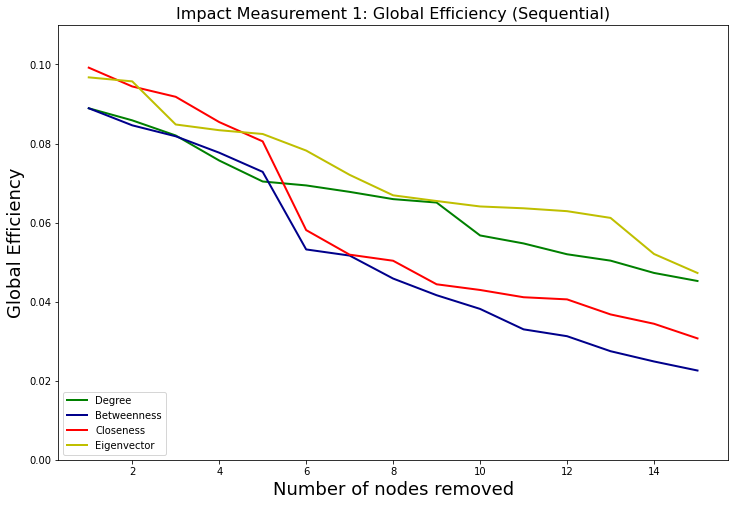

In [67]:
# plot the line chart: S_GE
plt.figure(figsize=(12,8))
plt.title('Impact Measurement 1: Global Efficiency (Sequential)',fontsize=16)
plt.xlabel(u'Number of nodes removed',fontsize=18)
plt.ylabel(u'Global Efficiency',fontsize=18)
 

in1, = plt.plot(bet_seq_ge_df.deg,color="green",linewidth=2)
in2, = plt.plot(bet_seq_ge_df.bet,color="darkblue",linewidth=2)
in3, = plt.plot(bet_seq_ge_df.clos,color="red",linewidth=2)
in4, = plt.plot(bet_seq_ge_df.eig,color="y",linewidth=2)
 
plt.ylim(0,0.11)  
plt.legend(handles = [in1,in2,in3,in4],labels=['Degree','Betweenness','Closeness','Eigenvector'],loc=3)
plt.show()#

##### largest connected component proportion

In [68]:
bet_seq_lcc_df = pd.DataFrame(range(1,16),bet_seq_lcc_list)
bet_seq_lcc_df['bet'] = bet_seq_lcc_df.index
bet_seq_lcc_df = bet_seq_lcc_df.set_index(0)

In [69]:
bet_seq_lcc_df['clos'] = clos_seq_lcc_list
bet_seq_lcc_df['deg'] = deg_seq_lcc_list
bet_seq_lcc_df['eig'] = eig_seq_lcc_list

In [70]:
bet_seq_lcc_df

,bet,clos,deg,eig
0,,,,
1,94.513716,99.750623,94.513716,99.750623
2,94.264339,99.501247,94.264339,99.501247
3,94.014963,99.251870,94.014963,94.014963
4,93.765586,99.002494,93.266833,93.765586
5,93.516209,98.753117,89.775561,93.516209
6,56.608479,56.359102,89.526185,93.017456
7,56.359102,56.359102,89.276808,92.269327
8,48.877805,56.109726,89.027431,88.778055
9,43.142145,48.628429,88.528678,88.528678


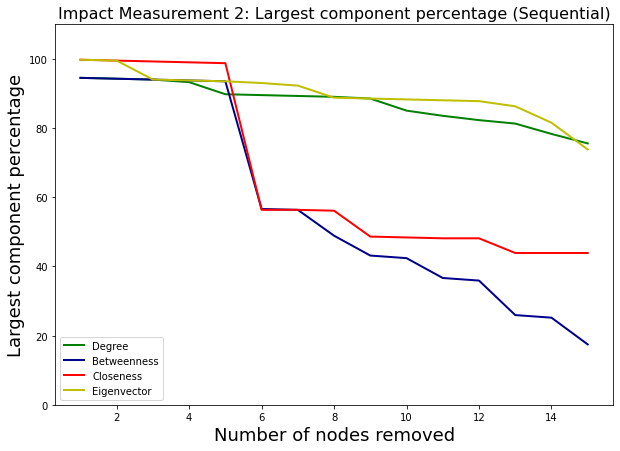

In [72]:
# plot the line chart: S_GE
plt.figure(figsize=(10,7))
plt.title('Impact Measurement 2: Largest component percentage (Sequential)',fontsize=16)
plt.xlabel(u'Number of nodes removed',fontsize=18)
plt.ylabel(u'Largest component percentage',fontsize=18)

in1, = plt.plot(bet_seq_lcc_df.deg,color="green",linewidth=2)
in2, = plt.plot(bet_seq_lcc_df.bet,color="darkblue",linewidth=2)
in3, = plt.plot(bet_seq_lcc_df.clos,color="red",linewidth=2)
in4, = plt.plot(bet_seq_lcc_df.eig,color="y",linewidth=2)
 
plt.ylim(0,110)      
plt.legend(handles = [in1,in2,in3,in4],labels=['Degree','Betweenness','Closeness','Eigenvector'],loc=3)
plt.show()#显示图像

### Models and calibration (section 3 and 4)

In [54]:
OD = pd.read_csv('OD_matrix.csv')

In [51]:
OD

,station_origin,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
0,Abbey Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
1,Acton Central,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
2,Acton Town,0,0,0,3,17,0,35,0,0,...,77,3,6,9,0,0,0,0,0,3745
3,Aldgate,0,0,0,0,0,0,0,0,0,...,0,0,4,8,0,0,0,0,0,2886
4,Aldgate East,0,0,2,0,0,0,0,0,0,...,24,0,0,12,0,1,0,1,0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Woodford,0,0,2,5,47,0,0,0,0,...,2,0,1,0,0,0,0,0,0,4868
396,Woodgrange Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530
397,Woodside Park,0,0,1,26,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3093
398,Woolwich Arsenal,20,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,7892


In [55]:
df_flow = pd.read_csv("london_flows.csv")

In [56]:
df_flow.sort_values(by='jobs')

,station_origin,station_destination,flows,population,jobs,distance
8518,Canada Water,Battersea Park,0,27026,0,10440.366798
55196,Wandsworth Road,Battersea Park,0,617,0,1168.489261
39816,Peckham Rye,Battersea Park,0,2407,0,6368.031315
55429,Wapping,Battersea Park,0,1251,0,11326.177642
11571,Clapham High Street,Battersea Park,0,1500,0,1790.459591
...,...,...,...,...,...,...
38674,Oval,Bank and Monument,349,3619,78549,3977.188464
38906,Oxford Circus,Bank and Monument,202,2784,78549,4181.523713
13302,Dagenham East,Bank and Monument,34,1924,78549,19573.018518
37273,Northwick Park,Bank and Monument,23,2114,78549,19908.994531


In [57]:
df_flow = df_flow[df_flow["station_origin"] != df_flow["station_destination"]]

In [20]:
df_flow

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [58]:
df_flow[df_flow['station_origin']==df_flow['station_destination']]

,station_origin,station_destination,flows,population,jobs,distance


In [59]:
df_flow['distance'] = df_flow['distance'].replace(0,0.0000000001)

In [60]:
df_flow['population'] = df_flow['population'].replace(0,0.0000000001)

In [61]:
df_flow['jobs'] = df_flow['jobs'].replace(0,0.0000000001)

In [62]:
df_flow.sort_values(by='jobs').head(20)

,station_origin,station_destination,flows,population,jobs,distance
21906,Haggerston,Battersea Park,0,2049.0,1.000000e-10,16384.952185
13687,Dalston Junction,Battersea Park,0,3912.0,1.000000e-10,17192.960480
8518,Canada Water,Battersea Park,0,27026.0,1.000000e-10,10440.366798
11571,Clapham High Street,Battersea Park,0,1500.0,1.000000e-10,1790.459591
26650,Honor Oak Park,Battersea Park,0,1750.0,1.000000e-10,14936.019983
39816,Peckham Rye,Battersea Park,0,2407.0,1.000000e-10,6368.031315
55196,Wandsworth Road,Battersea Park,0,617.0,1.000000e-10,1168.489261
21733,Hackney Central,Battersea Park,0,3370.0,1.000000e-10,21027.763711
59395,Whitechapel,Battersea Park,0,12281.0,1.000000e-10,13279.299701
45367,Shoreditch High Street,Battersea Park,0,930.0,1.000000e-10,14475.121149


In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [64]:
#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    df_flow[f"log_{x}"] = np.log(df_flow[x])
    log_x_vars.append(f"log_{x}")

In [29]:
df_flow

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274
...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795549,8.973605,8.114325,9.503144
61470,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245
61471,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905
61472,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832


#### Unconstrained

In [65]:
#create the formula
formula = 'flows ~ log_population + log_jobs + log_distance'

#run the regression
unconSim = smf.glm(formula = formula, 
                  data=df_flow, 
                  family=sm.families.Poisson()).fit()


In [66]:
df_flow["unconsimfitted"] = np.round(unconSim.mu)

In [67]:
print(unconSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61452
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2785e+06
Date:                Mon, 02 May 2022   Deviance:                   2.3848e+06
Time:                        11:53:41   Pearson chi2:                 4.76e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.7475      0.014   -273.

In [68]:
CalcRSqaured(df_flow["flows"],df_flow["unconsimfitted"])

0.3212076758264852

In [87]:
CalcRMSE(df_flow["flows"],df_flow["unconsimfitted"])

108.296

#### Production (origin) Constrained Spatial Interaction Model

In [69]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_jobs + log_distance-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=df_flow, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Mon, 02 May 2022   Deviance:                   1.8615e+06
Time:                        11:55:01   Pearson chi2:                 2.78e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [70]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
df_flow_pro = df_flow.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
df_flow_pro.drop(columns = ["coef"], inplace = True)
#check this has worked
df_flow_pro.head()


<ipython-input-70-e08570a09204>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconsimfitted,alpha_i
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50.0,3.250242
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,3.250242
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2.0,3.250242
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53.0,3.250242
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32.0,3.250242


In [71]:
alpha_i = prodSim.params[0:-3]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]

In [72]:
beta

0.8781191183724119

In [73]:
df_flow_pro["prodsimest1"] = np.exp(df_flow_pro["alpha_i"]+gamma*df_flow_pro["log_jobs"] 
                                 - beta*df_flow_pro["log_distance"])

In [74]:
CalcRSqaured(df_flow_pro["flows"], df_flow_pro["prodsimest1"])

0.38828407467857756

In [75]:
#CalcRSquared(cdatasub["Total"], cdatasub["prodsimest1"])
CalcRMSE(df_flow_pro["flows"], df_flow_pro["prodsimest1"])

102.857

In [36]:
#first round the estimates
df_flow_pro["prodsimest1"] = round(df_flow_pro["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
tb_flow_pro = df_flow_pro.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
tb_flow_pro

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [355]:
df_flow_pro

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prosimFitted0,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,55.0,3.250242,55.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,3.250242,1.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3.0,3.250242,3.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66.0,3.250242,66.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,49.0,3.250242,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795549,8.973605,8.114325,9.503144,NaN,6.905590,121.0
61452,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,NaN,6.905590,259.0
61453,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,NaN,6.905590,32.0
61454,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,NaN,6.905590,98.0


In [132]:
tb_flow_original = df_flow.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
tb_flow_original

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [ ]:
tb_flow_original

#### Attraction (destination) Constrained Spatial Interaction Model

In [76]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_destination + log_population + log_distance-1'
#run a production constrained sim
attrSim = smf.glm(formula = formula, data=df_flow, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(attrSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1646e+06
Date:                Mon, 02 May 2022   Deviance:                   2.1570e+06
Time:                        11:58:17   Pearson chi2:                 3.65e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [77]:
#get the estimates
df_flow["attrsimfitted"] = np.round(attrSim.mu)
#here's the matrix
table_attr = df_flow.pivot_table(values ="attrsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
table_attr

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,591.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,586.0
Acton Town,NaN,NaN,NaN,16.0,16.0,NaN,8.0,1.0,NaN,17.0,...,26.0,3.0,5.0,9.0,NaN,2.0,NaN,2.0,NaN,3546.0
Aldgate,NaN,NaN,6.0,NaN,62.0,NaN,NaN,1.0,NaN,36.0,...,19.0,NaN,6.0,5.0,NaN,2.0,NaN,3.0,NaN,5702.0
Aldgate East,NaN,NaN,6.0,68.0,NaN,NaN,3.0,1.0,NaN,37.0,...,20.0,2.0,7.0,5.0,NaN,3.0,NaN,3.0,NaN,6029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,6.0,20.0,21.0,NaN,NaN,NaN,NaN,19.0,...,19.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3431.0
Woodgrange Park,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0
Woodside Park,NaN,NaN,5.0,14.0,13.0,NaN,2.0,NaN,NaN,16.0,...,15.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2404.0


In [163]:
OD

,station_origin,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
0,Abbey Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
1,Acton Central,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
2,Acton Town,0,0,0,3,17,0,35,0,0,...,77,3,6,9,0,0,0,0,0,3745
3,Aldgate,0,0,0,0,0,0,0,0,0,...,0,0,4,8,0,0,0,0,0,2886
4,Aldgate East,0,0,2,0,0,0,0,0,0,...,24,0,0,12,0,1,0,1,0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Woodford,0,0,2,5,47,0,0,0,0,...,2,0,1,0,0,0,0,0,0,4868
396,Woodgrange Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530
397,Woodside Park,0,0,1,26,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3093
398,Woolwich Arsenal,20,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,7892


In [78]:
CalcRSqaured(df_flow["flows"], df_flow["attrsimfitted"])

0.34994897266233405

In [56]:
CalcRMSE(df_flow["flows"],df_flow["attrsimfitted"])

105.976

#### doubly constrained

In [79]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + station_destination + log_distance-1'
#run a doubly constrained sim
doubSim = smf.glm(formula = formula, data=df_flow, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    60658
Model Family:                 Poisson   Df Model:                          797
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.7074e+05
Date:                Mon, 02 May 2022   Deviance:                   1.7693e+06
Time:                        12:03:47   Pearson chi2:                 2.47e+06
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [80]:
#get the estimates
df_flow["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
table_doub = df_flow.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
table_doub

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [51]:
OD

,station_origin,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
0,Abbey Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
1,Acton Central,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
2,Acton Town,0,0,0,3,17,0,35,0,0,...,77,3,6,9,0,0,0,0,0,3745
3,Aldgate,0,0,0,0,0,0,0,0,0,...,0,0,4,8,0,0,0,0,0,2886
4,Aldgate East,0,0,2,0,0,0,0,0,0,...,24,0,0,12,0,1,0,1,0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Woodford,0,0,2,5,47,0,0,0,0,...,2,0,1,0,0,0,0,0,0,4868
396,Woodgrange Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530
397,Woodside Park,0,0,1,26,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3093
398,Woolwich Arsenal,20,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,7892


In [81]:
CalcRSqaured(df_flow["flows"], df_flow["doubsimfitted"])

0.40770034724103515

In [53]:
CalcRMSE(df_flow["flows"],df_flow["doubsimfitted"])

101.3

#### Scenario A

In [82]:
df_flow[df_flow['station_destination']=='Canary Wharf']

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconsimfitted,attrsimfitted,doubsimfitted
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53.0,70.0,77.0
126,Acton Town,Canary Wharf,57,3745.0,58772.0,20398.165882,8.228177,10.981421,9.923200,86.0,113.0,89.0
348,Aldgate,Canary Wharf,1,2886.0,58772.0,6564.419680,7.967627,10.981421,8.789419,144.0,191.0,73.0
595,Aldgate East,Canary Wharf,3,3172.0,58772.0,5127.998899,8.062118,10.981421,8.542471,180.0,240.0,105.0
817,All Saints,Canary Wharf,67,740.0,58772.0,1340.088733,6.606650,10.981421,7.200491,143.0,190.0,239.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60595,Wood Green,Canary Wharf,64,6667.0,58772.0,16849.246595,8.804925,10.981421,9.732061,148.0,196.0,196.0
60838,Wood Lane,Canary Wharf,0,1088.0,58772.0,17092.091760,6.992096,10.981421,9.746371,39.0,50.0,26.0
61062,Woodford,Canary Wharf,192,4868.0,58772.0,13963.787075,8.490438,10.981421,9.544223,132.0,175.0,240.0
61294,Woodside Park,Canary Wharf,42,3093.0,58772.0,22356.567178,8.036897,10.981421,10.014875,71.0,92.0,98.0


In [83]:
def new_jobs(row):
    if row["station_destination"] == "Canary Wharf":
        val = 58772.0/2
    else:
        val = row["jobs"]
    return val
        
df_flow["Scenario_A_jobs"] = df_flow.apply(new_jobs, axis =1)
df_flow.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconsimfitted,attrsimfitted,doubsimfitted,Scenario_A_jobs
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50.0,53.0,55.0,78549.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,3.0,2.0,442.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2.0,4.0,3.0,665.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53.0,70.0,77.0,29386.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32.0,33.0,45.0,15428.0
5,Abbey Road,Crossharbour,1,599.0,1208.0,6686.475560,6.395262,7.096721,8.807842,2.0,5.0,3.0,1208.0
6,Abbey Road,Custom House,0,599.0,845.0,3824.855630,6.395262,6.739337,8.249276,3.0,5.0,4.0,845.0
7,Abbey Road,Cutty Sark,2,599.0,1748.0,8503.898909,6.395262,7.466228,9.048280,3.0,8.0,5.0,1748.0
8,Abbey Road,Cyprus,7,599.0,850.0,6532.099618,6.395262,6.745236,8.784484,2.0,5.0,4.0,850.0
9,Abbey Road,Devons Road,1,599.0,611.0,3958.324171,6.395262,6.415097,8.283576,2.0,4.0,3.0,611.0


In [84]:
#calculate some new wj^alpha and d_ij^beta values
dist_beta = df_flow["distance"]**-beta
Dj3_gamma = df_flow["Scenario_A_jobs"]**gamma
#calcualte the first stage of the Ai values
df_flow["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(df_flow.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i_new"}, inplace=True)
#and write the A_i values back into the dataframe
df_flow_s_A = df_flow.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [ ]:
df_flow_s_A

In [85]:
#to check everything works, recreate the original estimates
df_flow_s_A["prodsimest_A"] = df_flow_s_A["A_i_new"]*df_flow_s_A["population"]*Dj3_gamma*dist_beta
#round
df_flow_s_A["prodsimest_A"] = round(df_flow_s_A["prodsimest_A"])

In [86]:
tb_flow_A = df_flow_s_A.pivot_table(values ="prodsimest_A", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
tb_flow_A

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3745.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,22.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2884.0
Aldgate East,NaN,NaN,2.0,53.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,36.0,39.0,NaN,NaN,NaN,NaN,33.0,...,16.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4863.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,21.0,21.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3091.0


In [62]:
OD

,station_origin,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
0,Abbey Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
1,Acton Central,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
2,Acton Town,0,0,0,3,17,0,35,0,0,...,77,3,6,9,0,0,0,0,0,3745
3,Aldgate,0,0,0,0,0,0,0,0,0,...,0,0,4,8,0,0,0,0,0,2886
4,Aldgate East,0,0,2,0,0,0,0,0,0,...,24,0,0,12,0,1,0,1,0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Woodford,0,0,2,5,47,0,0,0,0,...,2,0,1,0,0,0,0,0,0,4868
396,Woodgrange Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530
397,Woodside Park,0,0,1,26,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3093
398,Woolwich Arsenal,20,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,7892


In [166]:
df_flow_s_A

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prosimFitted0,Scenario_A_jobs,Ai1,A_i_new,prodsimest_A
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,55.0,78549.0,2.132479,0.045134,58.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,442.0,0.038226,0.045134,1.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,3.0,665.0,0.106822,0.045134,3.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,66.0,29386.0,1.512182,0.045134,41.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,49.0,15428.0,1.901840,0.045134,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795549,8.973605,8.114325,9.503144,NaN,3342.0,0.121469,0.136719,131.0
61470,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,NaN,5487.0,0.259825,0.136719,280.0
61471,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,NaN,400.0,0.032033,0.136719,35.0
61472,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,NaN,893.0,0.098573,0.136719,106.0


In [87]:
df_flow_s_A['distance'].max()

60633.323742438224

In [88]:
#create distance tier
# create a list of our conditions
conditions = [
    (df_flow_s_A['distance'] <= 5000),
    (df_flow_s_A['distance'] > 5000) & (df_flow_s_A['distance'] <= 10000),
    (df_flow_s_A['distance'] > 10000) & (df_flow_s_A['distance'] <= 15000),
    (df_flow_s_A['distance'] > 15000) & (df_flow_s_A['distance'] <= 20000),
    (df_flow_s_A['distance'] > 20000) & (df_flow_s_A['distance'] <= 25000),
    (df_flow_s_A['distance'] > 25000) & (df_flow_s_A['distance'] <= 30000),
    (df_flow_s_A['distance'] > 30000) & (df_flow_s_A['distance'] <= 35000),
    (df_flow_s_A['distance'] > 35000) & (df_flow_s_A['distance'] <= 40000),
    (df_flow_s_A['distance'] > 40000) & (df_flow_s_A['distance'] <= 45000),
    (df_flow_s_A['distance'] > 45000) & (df_flow_s_A['distance'] <= 50000),
    (df_flow_s_A['distance'] > 50000) & (df_flow_s_A['distance'] <= 55000),
    (df_flow_s_A['distance'] > 55000)
    ]

# create a list of the values we want to assign for each condition
values = ['tier_1', 'tier_2', 'tier_3', 'tier_4','tier_5','tier_6','tier_7','tier_8','tier_9','tier_10','tier_11','tier_12']

# create a new column and use np.select to assign values to it using our lists as arguments
df_flow_s_A['Distance_tier'] = np.select(conditions, values)

# display updated DataFrame
df_flow_s_A.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconsimfitted,attrsimfitted,doubsimfitted,Scenario_A_jobs,Ai1,A_i_new,prodsimest_A,Distance_tier
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50.0,53.0,55.0,78549.0,2.132479,0.045134,58.0,tier_2
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,3.0,2.0,442.0,0.038226,0.045134,1.0,tier_2
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2.0,4.0,3.0,665.0,0.106822,0.045134,3.0,tier_1
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53.0,70.0,77.0,29386.0,1.512182,0.045134,41.0,tier_2
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32.0,33.0,45.0,15428.0,1.901840,0.045134,51.0,tier_1


In [89]:
flow_A = pd.DataFrame(df_flow_s_A.groupby(["station_destination"])["prodsimest_A",'flows'].agg(np.sum))

<ipython-input-89-e9b3bb91d420>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  flow_A = pd.DataFrame(df_flow_s_A.groupby(["station_destination"])["prodsimest_A",'flows'].agg(np.sum))


In [57]:
flow_A

,prodsimest_A,flows
station_destination,,
Abbey Road,470.0,345
Acton Central,393.0,750
Acton Town,2182.0,2202
Aldgate,8836.0,7782
Aldgate East,9400.0,7932
...,...,...
Wood Street,342.0,404
Woodford,666.0,706
Woodgrange Park,156.0,242


In [90]:
flow_A['difference_A'] = flow_A['prodsimest_A'] - flow_A['flows']


In [91]:
flow_A.sort_values(by='prodsimest_A',ascending=False).head(10)

,prodsimest_A,flows,difference_A
station_destination,,,
Bank and Monument,73541.0,78549,-5008.0
Stratford,67387.0,55954,11433.0
Liverpool Street,63048.0,61122,1926.0
Oxford Circus,37945.0,44368,-6423.0
Canary Wharf,31313.0,58772,-27459.0
King's Cross St. Pancras,29131.0,33330,-4199.0
Highbury & Islington,29020.0,25385,3635.0
London Bridge,28084.0,29926,-1842.0
Victoria,27585.0,33251,-5666.0


In [93]:
flow_A = flow_A.rename(columns={'prodsimest_A':'Scenario_A flows','flows':'Original flows'})

In [94]:
flow_A.sort_values(by='difference_A')

,Scenario_A flows,Original flows,difference_A
station_destination,,,
Canary Wharf,31313.0,58772,-27459.0
Oxford Circus,37945.0,44368,-6423.0
Victoria,27585.0,33251,-5666.0
Bank and Monument,73541.0,78549,-5008.0
Hammersmith,13543.0,18250,-4707.0
...,...,...,...
Embankment,13815.0,10220,3595.0
Highbury & Islington,29020.0,25385,3635.0
Canada Water,25831.0,20443,5388.0


In [95]:
G_difference = nx.read_graphml("london.graph")

In [96]:
# there are two stations in the network file but not in the london_flows file, 
#so in order to plot them later, here thes two stations need to be removed
G_difference.remove_nodes_from(['Nine Elms','Battersea Power Station'])

In [97]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G_difference.nodes():
    G_difference.nodes[node]['coords'] = eval(G_difference.nodes[node]['coords'])
    
pos_G_difference = nx.get_node_attributes(G_difference, 'coords')

In [98]:
len(list(G_difference.nodes(data = True)))

399

In [99]:
nx.set_node_attributes(G_difference,dict(flow_A['difference_A']),'difference_A')

In [144]:
list(G_difference.nodes(data = True))


[('Wembley Park',
  {'coords': (519316.5590174915, 186389.32981656672),
   'difference_A': -1734.0}),
 ('Kingsbury',
  {'coords': (519359.9688603217, 188721.22027255083), 'difference_A': -151.0}),
 ('Queensbury',
  {'coords': (518811.3613368616, 189760.50737704366), 'difference_A': -24.0}),
 ('Canons Park',
  {'coords': (518183.29968291725, 191257.26260848), 'difference_A': -99.0}),
 ('Stanmore',
  {'coords': (517580.4596464033, 192537.99948098673), 'difference_A': -318.0}),
 ('Stratford',
  {'coords': (538524.7855297636, 184373.34100822973),
   'difference_A': 11433.0}),
 ('West Ham',
  {'coords': (539160.2577659411, 182933.290067989), 'difference_A': 2656.0}),
 ('Canning Town',
  {'coords': (539439.020753582, 181338.40907066417), 'difference_A': 2054.0}),
 ('North Greenwich',
  {'coords': (539189.2108512281, 179809.60035511653), 'difference_A': -557.0}),
 ('Canary Wharf',
  {'coords': (537586.6947649193, 180311.85419390627),
   'difference_A': -27459.0}),
 ('Canada Water',
  {'coords

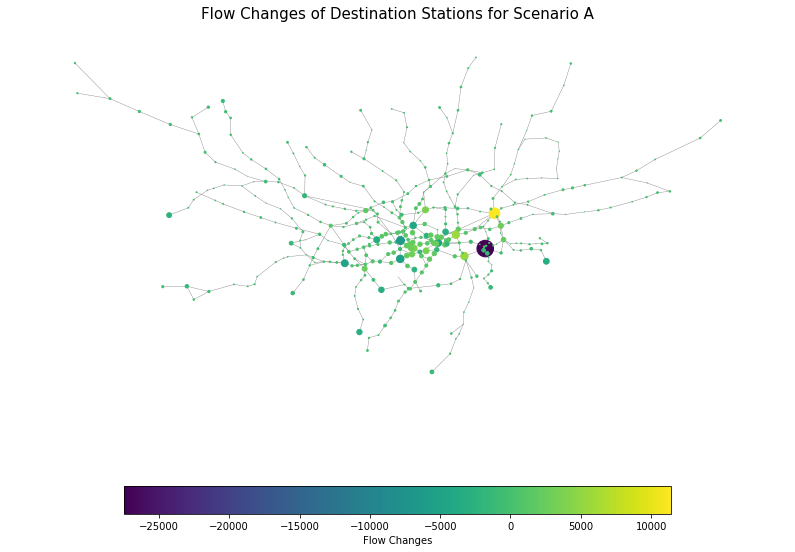

In [100]:
# Lets set color and width of nodes according to the closeness values

difference_A_val=[(i[1]['difference_A']) for i in G_difference.nodes(data=True)]

difference_A_color=[(i[1]['difference_A']) for i in G_difference.nodes(data=True)]
difference_A_size=[abs((i[1]['difference_A']))*0.01 for i in G_difference.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(14,10))

nx.draw_networkx_edges(G_difference, pos_G_difference,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G_difference,
        pos = pos_G_difference,
        node_color= difference_A_color,
        node_size= difference_A_size, alpha=1)

plt.colorbar(nod,label="Flow Changes",orientation="horizontal", shrink=0.7)
plt.axis("off")
plt.title("Flow Changes of Destination Stations for Scenario A",fontsize=15)
#plt.clim(-30000, 15000) 
plt.show()

#### Scenario B

In [101]:
df_flow_s_B = df_flow_s_A

##### B1 (β = 1.0)

In [102]:
df_flow_s_B3 = df_flow_s_B

In [316]:
## 
beta

0.8781191183724119

In [103]:
#calculate some new wj^alpha and d_ij^beta values
dist_beta_B3 = df_flow_s_B3["distance"]**(-1)
Dj3_gamma_B3 = df_flow_s_B3["jobs"]**gamma
#calcualte the first stage of the Ai values
df_flow_s_B3["Ai4"] = dist_beta_B3 * Dj3_gamma_B3
#now do the sum over all js bit
A_i = pd.DataFrame(df_flow_s_B3.groupby(["station_origin"])["Ai4"].agg(np.sum))
#now divide into 1
A_i["Ai4"] = 1/A_i["Ai4"]
A_i.rename(columns={"Ai4":"A_i_s_B3"}, inplace=True)
#and write the A_i values back into the dataframe
df_flow_s_B3 = df_flow_s_B3.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [104]:
df_flow_s_B3

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconsimfitted,attrsimfitted,doubsimfitted,Scenario_A_jobs,Ai1,A_i_new,prodsimest_A,Distance_tier,Ai4,A_i_s_B3
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50.0,53.0,55.0,78549.0,2.132479,0.045134,58.0,tier_2,0.711721,0.107905
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,3.0,2.0,442.0,0.038226,0.045134,1.0,tier_2,0.012688,0.107905
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2.0,4.0,3.0,665.0,0.106822,0.045134,3.0,tier_1,0.039147,0.107905
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53.0,70.0,77.0,29386.0,1.512182,0.045134,41.0,tier_2,0.910413,0.107905
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32.0,33.0,45.0,15428.0,1.901840,0.045134,51.0,tier_1,0.743199,0.107905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795549,8.973605,8.114325,9.503144,22.0,82.0,257.0,3342.0,0.121469,0.136719,131.0,tier_3,0.038146,0.385846
61470,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,42.0,33.0,152.0,5487.0,0.259825,0.136719,280.0,tier_2,0.086004,0.385846
61471,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,5.0,7.0,20.0,400.0,0.032033,0.136719,35.0,tier_2,0.010485,0.385846
61472,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,14.0,34.0,115.0,893.0,0.098573,0.136719,106.0,tier_2,0.034617,0.385846


In [105]:
#to check everything works, recreate the original estimates
df_flow_s_B3["prodsimest_B3"] = df_flow_s_B3["A_i_s_B3"]*df_flow_s_B["population"]*Dj3_gamma_B3*dist_beta_B3
#round
df_flow_s_B3["prodsimest_B3"] = round(df_flow_s_B3["prodsimest_B3"])

In [106]:
tb_flow_B3 = df_flow_s_B3.pivot_table(values ="prodsimest_B3", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
tb_flow_B3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,17.0,17.0,NaN,10.0,1.0,NaN,19.0,...,16.0,3.0,5.0,13.0,NaN,1.0,NaN,2.0,NaN,3745.0
Aldgate,NaN,NaN,2.0,NaN,50.0,NaN,NaN,0.0,NaN,21.0,...,3.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2879.0
Aldgate East,NaN,NaN,2.0,58.0,NaN,NaN,1.0,0.0,NaN,23.0,...,4.0,1.0,2.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,14.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4869.0
Woodgrange Park,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3090.0


In [107]:
flow_B_3 = pd.DataFrame(df_flow_s_B3.groupby(["station_destination"])["prodsimest_B3",'flows'].agg(np.sum))
flow_B_3['difference from origin flows'] = flow_B_3['prodsimest_B3'] - flow_B_3['flows']
flow_B_3 = flow_B_3.rename(columns={'prodsimest_B3':'Scenario_B3 flows','flows':'Original flows'})
flow_B_3.sort_values(by='difference from origin flows')

<ipython-input-107-6585e3382bd6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  flow_B_3 = pd.DataFrame(df_flow_s_B3.groupby(["station_destination"])["prodsimest_B3",'flows'].agg(np.sum))


,Scenario_B3 flows,Original flows,difference from origin flows
station_destination,,,
Canary Wharf,50163.0,58772,-8609.0
Oxford Circus,37776.0,44368,-6592.0
Victoria,27252.0,33251,-5999.0
Bank and Monument,72649.0,78549,-5900.0
Hammersmith,13224.0,18250,-5026.0
...,...,...,...
Southwark,14075.0,10326,3749.0
Embankment,14137.0,10220,3917.0
Whitechapel,22708.0,17633,5075.0


In [131]:
CalcRSqaured(df_flow_s_B3["flows"],df_flow_s_B3["prodsimest_B3"])

0.3619672339420273

In [108]:
nx.set_node_attributes(G_difference,dict(flow_B_3['difference from origin flows']),'difference_B1')

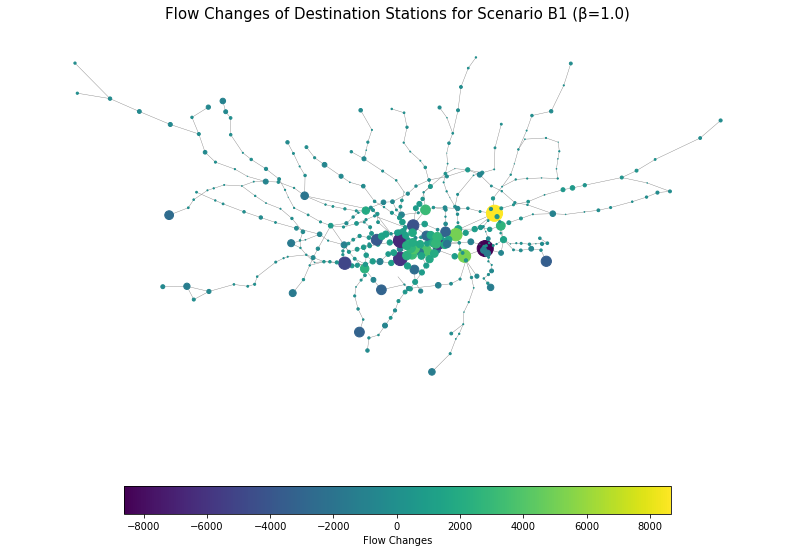

In [109]:
# Lets set color and width of nodes according to the closeness values

difference_B1_val=[(i[1]['difference_B1']) for i in G_difference.nodes(data=True)]

difference_B1_color=[(i[1]['difference_B1']) for i in G_difference.nodes(data=True)]
difference_B1_size=[abs((i[1]['difference_B1']))*0.03 for i in G_difference.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(14,10))

nx.draw_networkx_edges(G_difference, pos_G_difference,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G_difference,
        pos = pos_G_difference,
        node_color= difference_B1_color,
        node_size= difference_B1_size, alpha=1)

plt.colorbar(nod,label="Flow Changes",orientation="horizontal",shrink=0.7)
plt.axis("off")
#plt.xlim(-10000,10000)  
plt.title("Flow Changes of Destination Stations for Scenario B1 (β=1.0)",fontsize=15)
plt.show()

##### B2 (β = 1.2)

In [110]:
df_flow_s_B4 = df_flow_s_B3

In [111]:
#calculate some new wj^alpha and d_ij^beta values
dist_beta_B4 = df_flow_s_B4["distance"]**(-1.2)
Dj3_gamma_B4 = df_flow_s_B4["jobs"]**gamma
#calcualte the first stage of the Ai values
df_flow_s_B4["Ai5"] = dist_beta_B4 * Dj3_gamma_B4
#now do the sum over all js bit
A_i = pd.DataFrame(df_flow_s_B4.groupby(["station_origin"])["Ai5"].agg(np.sum))
#now divide into 1
A_i["Ai5"] = 1/A_i["Ai5"]
A_i.rename(columns={"Ai5":"A_i_s_B4"}, inplace=True)
#and write the A_i values back into the dataframe
df_flow_s_B4 = df_flow_s_B4.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [112]:
#to check everything works, recreate the original estimates
df_flow_s_B4["prodsimest_B4"] = df_flow_s_B4["A_i_s_B4"]*df_flow_s_B4["population"]*Dj3_gamma_B4*dist_beta_B4
#round
df_flow_s_B4["prodsimest_B4"] = round(df_flow_s_B4["prodsimest_B4"])

In [113]:
tb_flow_B4 = df_flow_s_B4.pivot_table(values ="prodsimest_B4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
tb_flow_B4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,601.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,0.0,NaN,17.0,...,14.0,3.0,4.0,15.0,NaN,1.0,NaN,2.0,NaN,3742.0
Aldgate,NaN,NaN,1.0,NaN,55.0,NaN,NaN,0.0,NaN,19.0,...,2.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2873.0
Aldgate East,NaN,NaN,1.0,66.0,NaN,NaN,0.0,0.0,NaN,21.0,...,2.0,0.0,2.0,1.0,NaN,1.0,NaN,1.0,NaN,3162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,6.0,35.0,40.0,NaN,NaN,NaN,NaN,31.0,...,12.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4871.0
Woodgrange Park,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,9.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [114]:
CalcRSqaured(df_flow_s_B4["flows"],df_flow_s_B4["prodsimest_B4"])

0.31056201468039246

In [115]:
flow_B_4 = pd.DataFrame(df_flow_s_B4.groupby(["station_destination"])["prodsimest_B4",'flows'].agg(np.sum))
flow_B_4['difference from origin flows'] = flow_B_4['prodsimest_B4'] - flow_B_4['flows']
flow_B_4 = flow_B_4.rename(columns={'prodsimest_B4':'Scenario_B4 flows','flows':'Original flows'})
flow_B_4.sort_values(by='difference from origin flows')

<ipython-input-115-b0ce18dd7a7f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  flow_B_4 = pd.DataFrame(df_flow_s_B4.groupby(["station_destination"])["prodsimest_B4",'flows'].agg(np.sum))


,Scenario_B4 flows,Original flows,difference from origin flows
station_destination,,,
Canary Wharf,49302.0,58772,-9470.0
Oxford Circus,37646.0,44368,-6722.0
Victoria,26870.0,33251,-6381.0
Hammersmith,13032.0,18250,-5218.0
Bank and Monument,73415.0,78549,-5134.0
...,...,...,...
Whitechapel,22143.0,17633,4510.0
Southwark,14859.0,10326,4533.0
Embankment,14849.0,10220,4629.0


In [198]:
flow_B_4.to_csv('flow_B_4.csv')

In [116]:
nx.set_node_attributes(G_difference,dict(flow_B_4['difference from origin flows']),'difference_B2')

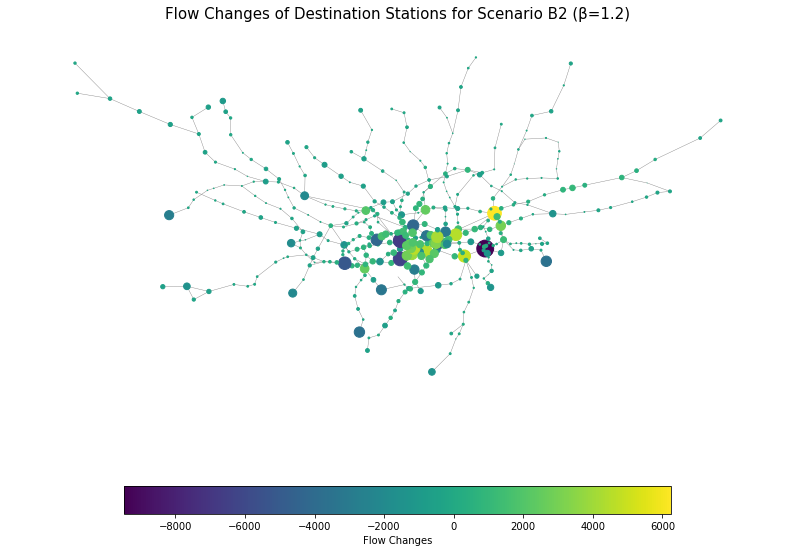

In [117]:
# Lets set color and width of nodes according to the closeness values

difference_B2_val=[(i[1]['difference_B2']) for i in G_difference.nodes(data=True)]

difference_B2_color=[(i[1]['difference_B2']) for i in G_difference.nodes(data=True)]
difference_B2_size=[abs((i[1]['difference_B2']))*0.03 for i in G_difference.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(14,10))

nx.draw_networkx_edges(G_difference, pos_G_difference,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G_difference,
        pos = pos_G_difference,
        node_color= difference_B2_color,
        node_size= difference_B2_size, alpha=1)

plt.colorbar(nod,label="Flow Changes",orientation="horizontal",shrink=0.7)
plt.axis("off")

#plt.clim(vmin=-8000, vmax=8000)
plt.title("Flow Changes of Destination Stations for Scenario B2 (β=1.2)",fontsize=15)
plt.show()

In [229]:
flow_B_4.sort_values(by='difference from origin flows',ascending=False).head(10)

,Scenario_B4 flows,Original flows,difference from origin flows
station_destination,,,
Stratford,62210.0,55954,6256.0
Canada Water,25343.0,20443,4900.0
Embankment,14849.0,10220,4629.0
Southwark,14859.0,10326,4533.0
Whitechapel,22143.0,17633,4510.0
Moorgate,28790.0,24574,4216.0
Westminster,19341.0,15466,3875.0
Cannon Street,7999.0,4698,3301.0
West Ham,8471.0,5487,2984.0


#### analysis

In [119]:
df_flow_s_B4

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconsimfitted,...,Ai1,A_i_new,prodsimest_A,Distance_tier,Ai4,A_i_s_B3,prodsimest_B3,Ai5,A_i_s_B4,prodsimest_B4
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50.0,...,2.132479,0.045134,58.0,tier_2,0.711721,0.107905,46.0,0.117564,0.475059,33.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,...,0.038226,0.045134,1.0,tier_2,0.012688,0.107905,1.0,0.002077,0.475059,1.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2.0,...,0.106822,0.045134,3.0,tier_1,0.039147,0.107905,3.0,0.007539,0.475059,2.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53.0,...,1.512182,0.045134,41.0,tier_2,0.910413,0.107905,59.0,0.165179,0.475059,47.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32.0,...,1.901840,0.045134,51.0,tier_1,0.743199,0.107905,48.0,0.159033,0.475059,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795549,8.973605,8.114325,9.503144,22.0,...,0.121469,0.136719,131.0,tier_3,0.038146,0.385846,116.0,0.005702,2.395570,108.0
61470,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,42.0,...,0.259825,0.136719,280.0,tier_2,0.086004,0.385846,262.0,0.014015,2.395570,265.0
61471,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,5.0,...,0.032033,0.136719,35.0,tier_2,0.010485,0.385846,32.0,0.001678,2.395570,32.0
61472,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,14.0,...,0.098573,0.136719,106.0,tier_2,0.034617,0.385846,105.0,0.006216,2.395570,118.0


In [123]:
dist_com = pd.DataFrame(df_flow_s_B4.groupby(['Distance_tier'])['flows','prodsimest_A','prodsimest_B3','prodsimest_B4'].agg(np.sum))

<ipython-input-123-93c085da1b03>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dist_com = pd.DataFrame(df_flow_s_B4.groupby(['Distance_tier'])['flows','prodsimest_A','prodsimest_B3','prodsimest_B4'].agg(np.sum))


In [127]:
dist_com = dist_com.rename(columns={'prodsimest_B3':'prodsimest_B1','prodsimest_B4':'prodsimest_B2'})

In [128]:
dist_com

,flows,prodsimest_A,prodsimest_B1,prodsimest_B2
Distance_tier,,,,
tier_1,511606,517706.0,556773.0,626208.0
tier_10,592,1047.0,1009.0,935.0
tier_11,54,224.0,218.0,196.0
tier_12,6,35.0,32.0,28.0
tier_2,531554,420257.0,410249.0,389427.0
tier_3,283705,288519.0,275218.0,253806.0
tier_4,125899,164835.0,157478.0,144061.0
tier_5,55607,86382.0,81851.0,74302.0
tier_6,20426,38215.0,35990.0,32270.0
